The optimal k value is: 13


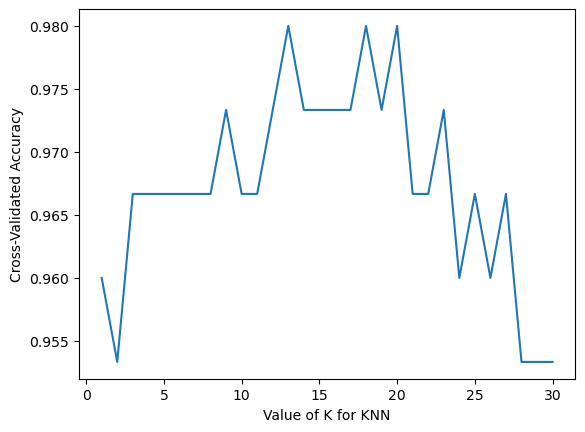

The optimal k value is: 13


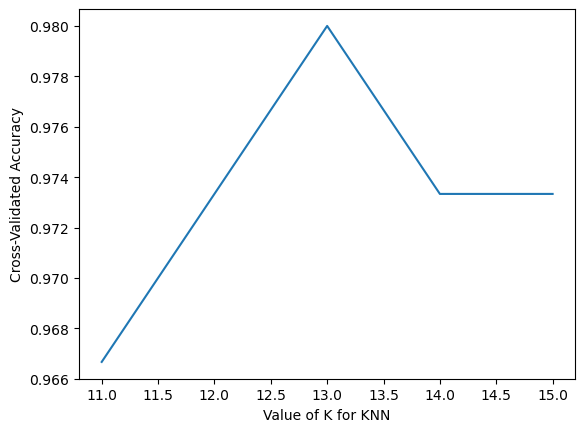

Best parameters: {'n_neighbors': 13}
Best score: 0.9800000000000001


In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

k_range = range(1, 31)
k_range_short = range(11, 16)

k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

optimal_k = k_range[k_scores.index(max(k_scores))]

print(f'The optimal k value is: {optimal_k}')

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

k_scores_short = []

for k in k_range_short:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores_short.append(scores.mean())

optimal_k_short = k_range_short[k_scores_short.index(max(k_scores_short))]

print(f'The optimal k value is: {optimal_k_short}')

plt.plot(k_range_short, k_scores_short)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

param_grid = {'n_neighbors': k_range}

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

grid.fit(X, y)

print(f'Best parameters: {grid.best_params_}')
print(f'Best score: {grid.best_score_}')
